In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df_shoot_vs_taser= pd.read_csv('shootings_wash_post.csv')
df_shoot_vs_taser

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


In [3]:
df_shoot_vs_taser.manner_of_death.value_counts()

shot                5119
shot and Tasered     270
Name: manner_of_death, dtype: int64

In [4]:
df_shoot_vs_taser.armed.value_counts()

gun                                 3047
knife                                789
unarmed                              350
toy weapon                           183
undetermined                         159
vehicle                              128
unknown weapon                        79
machete                               44
Taser                                 26
ax                                    24
sword                                 22
baseball bat                          18
gun and knife                         17
hammer                                15
sharp object                          13
screwdriver                           13
box cutter                            12
metal pipe                            12
hatchet                               11
gun and car                           11
gun and vehicle                       10
crossbow                               9
scissors                               7
rock                                   6
pipe            

In [5]:
df_shoot_vs_taser['lethal or not weapon']= df_shoot_vs_taser.armed.apply(lambda x: 1 if x == 'gun' else 0)
df_shoot_vs_taser.date.min()

'2015-01-02'

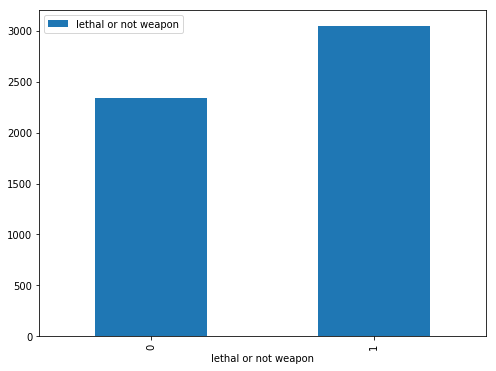

In [6]:
let_vs_not_let = df_shoot_vs_taser.groupby(['lethal or not weapon'])[['lethal or not weapon']].count()
#let_vs_not_let1 = round(let_vs_not_let/let_vs_not_let.sum()*100)
let_vs_not_let.plot(kind = 'bar',figsize=(8,6))

In [7]:
let_vs_not_let2 = df_shoot_vs_taser.groupby(['lethal or not weapon', 'manner_of_death'])[['lethal or not weapon']].count()
let_vs_not_let2

lethal or not weapon
lethal or not weapon manner_of_death                       
0                    shot                              2112
                     shot and Tasered                   230
1                    shot                              3007
                     shot and Tasered                    40

In [8]:
more_accurate= df_shoot_vs_taser.groupby(['armed']).size().sort_values(ascending=False).head()
more_accurate1 = round(more_accurate/more_accurate.sum()*100)
more_accurate1

armed
gun             67.0
knife           17.0
unarmed          8.0
toy weapon       4.0
undetermined     4.0
dtype: float64

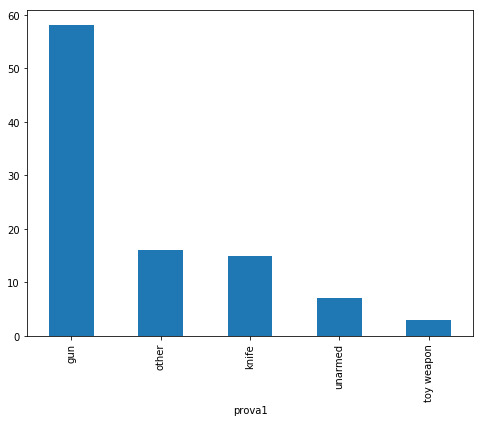

In [9]:
df_shoot_vs_taser['prova1']=df_shoot_vs_taser.armed.apply(lambda x: 'gun' if x == 'gun' else ('unarmed' if x == 'unarmed' else ('knife' if x =='knife' else('toy weapon' if x == 'toy weapon' else('undetermined' if x == 'undetermined' else 'other')))))
more_accurate2 = df_shoot_vs_taser.groupby(['prova1']).size().sort_values(ascending=False).head()
more_accurate2 = round(more_accurate2/more_accurate2.sum()*100)
more_accurate2.plot(kind = 'bar',figsize=(8,6))

In [10]:
df_deaths_vs_arrest = pd.read_csv('deaths_arrests_race.csv')
df_deaths_vs_arrest

,State,City,PD,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),...,Violent crimes 2015 (if reported by agency),Violent crimes 2016 (if reported by agency),Violent crimes 2017 (if reported by agency),Violent crimes 2018 (if reported by agency),2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests
0,New Mexico,Albuquerque,Albuquerque Police Department,3.0,18.0,NaN,NaN,NaN,10.0,1.0,...,5406.0,6245.0,7686.0,7646.0,27700.0,25447.0,22126.0,20341.0,21130.0,22254.0
1,California,Anaheim,Anaheim Police Department,3.0,7.0,NaN,NaN,NaN,3.0,NaN,...,1271.0,1209.0,1253.0,1192.0,7891.0,8137.0,8381.0,9415.0,8869.0,10019.0
2,Alaska,Anchorage,Anchorage Police Department,1.0,1.0,2.0,NaN,NaN,5.0,4.0,...,3226.0,3422.0,3564.0,3824.0,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0
3,Texas,Arlington,Arlington Police Department,7.0,1.0,NaN,1.0,NaN,4.0,1.0,...,1946.0,2188.0,NaN,1784.0,17258.0,16222.0,13989.0,11024.0,8397.0,9566.0
4,Georgia,Atlanta,Atlanta Police Department,13.0,NaN,NaN,NaN,NaN,1.0,1.0,...,5203.0,5121.0,4504.0,3814.0,30505.0,26958.0,NaN,22161.0,22581.0,NaN
5,Colorado,Aurora,Aurora Police Department,8.0,3.0,NaN,1.0,NaN,7.0,2.0,...,1660.0,1939.0,2239.0,2716.0,21182.0,20469.0,19155.0,17455.0,15907.0,15662.0
6,Texas,Austin,Austin Police Department,5.0,7.0,NaN,NaN,NaN,19.0,1.0,...,3497.0,3903.0,4032.0,3720.0,37024.0,36524.0,33101.0,30687.0,28485.0,24359.0
7,California,Bakersfield,Bakersfield Police Department,3.0,15.0,NaN,1.0,NaN,5.0,NaN,...,1810.0,1821.0,1827.0,1895.0,16786.0,20912.0,21814.0,21629.0,16822.0,13048.0
8,Maryland,Baltimore,Baltimore Police Department,27.0,NaN,NaN,NaN,NaN,3.0,1.0,...,9542.0,11010.0,12430.0,11100.0,47560.0,46232.0,32939.0,29661.0,29044.0,25567.0
9,Louisiana,Baton Rouge,Baton Rouge Police Department,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2001.0,2143.0,2335.0,2067.0,NaN,NaN,15244.0,13322.0,12829.0,10773.0


In [12]:
cln = df_deaths_vs_arrest[['2014 Total Arrests','2015 Total Arrests','2016 Total Arrests','2017 Total Arrests','2018 Total Arrests']]
cln = pd.DataFrame(cln)
cln.head()

,2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests
0,25447.0,22126.0,20341.0,21130.0,22254.0
1,8137.0,8381.0,9415.0,8869.0,10019.0
2,14748.0,14387.0,13294.0,13871.0,13973.0
3,16222.0,13989.0,11024.0,8397.0,9566.0
4,26958.0,NaN,22161.0,22581.0,NaN


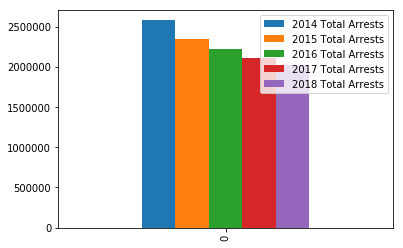

In [14]:
cln = round(cln.apply(lambda x: x.fillna(x.mean()),axis=0))
a = pd.DataFrame(cln.sum())
b = a.transpose()
c = range(len(b))
b.plot(kind='bar')

In [15]:
df_police_deaths= pd.read_csv('police_killings.csv')
df_police_deaths.drop(df_police_deaths.iloc[:, -39:-1], inplace = True, axis = 1)
df_police_deaths

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unarmed,Alleged Weapon (Source: WaPo),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),ID,Unnamed: 65
0,Eric M. Tellez,28,Male,White,https://fatalencounters.org/wp-content/uploads...,31/12/2019,Broad St.,Globe,AZ,85501.0,...,Allegedly Armed,knife,other,not fleeing,no,5332.0,NaN,Rural,7664.0,NaN
1,Name withheld by police,NaN,Male,Unknown race,NaN,31/12/2019,7239-7411 I-40,Memphis,AR,38103.0,...,Unclear,unclear,other,NaN,NaN,NaN,NaN,Urban,7665.0,NaN
2,Terry Hudson,57,Male,Black,NaN,31/12/2019,3600 N 24th St,Omaha,NE,68110.0,...,Allegedly Armed,gun,attack,not fleeing,no,5359.0,NaN,Urban,7661.0,NaN
3,Malik Williams,23,Male,Black,NaN,31/12/2019,30800 14th Avenue South,Federal Way,WA,98003.0,...,Allegedly Armed,gun,attack,not fleeing,no,5358.0,NaN,Suburban,7662.0,NaN
4,Frederick Perkins,37,Male,Black,NaN,31/12/2019,17057 N Outer 40 Rd,Chesterfield,MO,63005.0,...,Vehicle,vehicle,attack,car,no,5333.0,NaN,Suburban,7667.0,NaN
5,Michael Vincent Davis,49,Male,White,NaN,31/12/2019,Dawn Street,Cross Lanes,WV,25313.0,...,Allegedly Armed,gun,attack,Foot,No,5374.0,NaN,Suburban,7663.0,NaN
6,Brian Elkins,47,Male,Unknown race,NaN,31/12/2019,2402-2898 MS-15,Blue Mountain,MS,38610.0,...,Unclear,unclear,other,car,no,5343.0,NaN,Rural,7666.0,NaN
7,Debra D. Arbuckle,51,Female,White,NaN,30/12/2019,E Mt Vernon St and S Webb Rd,Wichita,KS,67207.0,...,Vehicle,vehicle,attack,car,no,5402.0,NaN,Suburban,7660.0,NaN
8,Name withheld by police,NaN,Male,Unknown race,NaN,30/12/2019,7111 Martin Luther King Blvd,Houston,TX,77033.0,...,Allegedly Armed,gun,NaN,NaN,NaN,5312.0,NaN,Urban,7658.0,NaN
9,Cody McCaulou,27,Male,White,NaN,30/12/2019,706 Hickman Ave,Fulton,MO,65251.0,...,Vehicle,vehicle,attack,car,no,5404.0,NaN,Rural,7659.0,NaN


In [16]:
df_police_deaths.drop(['Unnamed: 65'],axis =1)
df_police_deaths


,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unarmed,Alleged Weapon (Source: WaPo),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),ID,Unnamed: 65
0,Eric M. Tellez,28,Male,White,https://fatalencounters.org/wp-content/uploads...,31/12/2019,Broad St.,Globe,AZ,85501.0,...,Allegedly Armed,knife,other,not fleeing,no,5332.0,NaN,Rural,7664.0,NaN
1,Name withheld by police,NaN,Male,Unknown race,NaN,31/12/2019,7239-7411 I-40,Memphis,AR,38103.0,...,Unclear,unclear,other,NaN,NaN,NaN,NaN,Urban,7665.0,NaN
2,Terry Hudson,57,Male,Black,NaN,31/12/2019,3600 N 24th St,Omaha,NE,68110.0,...,Allegedly Armed,gun,attack,not fleeing,no,5359.0,NaN,Urban,7661.0,NaN
3,Malik Williams,23,Male,Black,NaN,31/12/2019,30800 14th Avenue South,Federal Way,WA,98003.0,...,Allegedly Armed,gun,attack,not fleeing,no,5358.0,NaN,Suburban,7662.0,NaN
4,Frederick Perkins,37,Male,Black,NaN,31/12/2019,17057 N Outer 40 Rd,Chesterfield,MO,63005.0,...,Vehicle,vehicle,attack,car,no,5333.0,NaN,Suburban,7667.0,NaN
5,Michael Vincent Davis,49,Male,White,NaN,31/12/2019,Dawn Street,Cross Lanes,WV,25313.0,...,Allegedly Armed,gun,attack,Foot,No,5374.0,NaN,Suburban,7663.0,NaN
6,Brian Elkins,47,Male,Unknown race,NaN,31/12/2019,2402-2898 MS-15,Blue Mountain,MS,38610.0,...,Unclear,unclear,other,car,no,5343.0,NaN,Rural,7666.0,NaN
7,Debra D. Arbuckle,51,Female,White,NaN,30/12/2019,E Mt Vernon St and S Webb Rd,Wichita,KS,67207.0,...,Vehicle,vehicle,attack,car,no,5402.0,NaN,Suburban,7660.0,NaN
8,Name withheld by police,NaN,Male,Unknown race,NaN,30/12/2019,7111 Martin Luther King Blvd,Houston,TX,77033.0,...,Allegedly Armed,gun,NaN,NaN,NaN,5312.0,NaN,Urban,7658.0,NaN
9,Cody McCaulou,27,Male,White,NaN,30/12/2019,706 Hickman Ave,Fulton,MO,65251.0,...,Vehicle,vehicle,attack,car,no,5404.0,NaN,Rural,7659.0,NaN


In [17]:
df_deaths_arrest = pd.read_csv('deaths_arrests_race.csv')
df_deaths_arrest.keys()
#df_policicies['Black People Killed by Police (1/1/2013-12/31/2019)'].sum()

Index(['State', 'City', 'PD',
       'Black People Killed by Police (1/1/2013-12/31/2019)',
       'Hispanic People Killed by Police (1/1/2013-12/31/2019)',
       'Native American People Killed by Police (1/1/2013-12/31/2019)',
       'Asian People Killed by Police (1/1/2013-12/31/2019)',
       'Pacific Islanders Killed by Police (1/1/2013-12/31/2019)',
       'White People Killed by Police (1/1/2013-12/31/2019)',
       'Unknown Race People Killed by Police (1/1/2013-12/31/2019)', 'Total',
       'Black', 'White', 'Amer. Indian', 'Asian', 'Hawaiian', 'Other',
       'Two or\nmore races', 'Hispanic',
       'Black-White Dissimilarity Index (2010)',
       'Murder and\nnonnegligent manslaughter',
       'Violent crimes 2013 (if reported by agency)',
       'Violent crimes 2014 (if reported by agency)',
       'Violent crimes 2015 (if reported by agency)',
       'Violent crimes 2016 (if reported by agency)',
       'Violent crimes 2017 (if reported by agency)',
       'Violent crimes 

In [18]:
df_deaths_arrest.head(72)

,State,City,PD,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),...,Violent crimes 2015 (if reported by agency),Violent crimes 2016 (if reported by agency),Violent crimes 2017 (if reported by agency),Violent crimes 2018 (if reported by agency),2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests
0,New Mexico,Albuquerque,Albuquerque Police Department,3.0,18.0,NaN,NaN,NaN,10.0,1.0,...,5406.0,6245.0,7686.0,7646.0,27700.0,25447.0,22126.0,20341.0,21130.0,22254.0
1,California,Anaheim,Anaheim Police Department,3.0,7.0,NaN,NaN,NaN,3.0,NaN,...,1271.0,1209.0,1253.0,1192.0,7891.0,8137.0,8381.0,9415.0,8869.0,10019.0
2,Alaska,Anchorage,Anchorage Police Department,1.0,1.0,2.0,NaN,NaN,5.0,4.0,...,3226.0,3422.0,3564.0,3824.0,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0
3,Texas,Arlington,Arlington Police Department,7.0,1.0,NaN,1.0,NaN,4.0,1.0,...,1946.0,2188.0,NaN,1784.0,17258.0,16222.0,13989.0,11024.0,8397.0,9566.0
4,Georgia,Atlanta,Atlanta Police Department,13.0,NaN,NaN,NaN,NaN,1.0,1.0,...,5203.0,5121.0,4504.0,3814.0,30505.0,26958.0,NaN,22161.0,22581.0,NaN
5,Colorado,Aurora,Aurora Police Department,8.0,3.0,NaN,1.0,NaN,7.0,2.0,...,1660.0,1939.0,2239.0,2716.0,21182.0,20469.0,19155.0,17455.0,15907.0,15662.0
6,Texas,Austin,Austin Police Department,5.0,7.0,NaN,NaN,NaN,19.0,1.0,...,3497.0,3903.0,4032.0,3720.0,37024.0,36524.0,33101.0,30687.0,28485.0,24359.0
7,California,Bakersfield,Bakersfield Police Department,3.0,15.0,NaN,1.0,NaN,5.0,NaN,...,1810.0,1821.0,1827.0,1895.0,16786.0,20912.0,21814.0,21629.0,16822.0,13048.0
8,Maryland,Baltimore,Baltimore Police Department,27.0,NaN,NaN,NaN,NaN,3.0,1.0,...,9542.0,11010.0,12430.0,11100.0,47560.0,46232.0,32939.0,29661.0,29044.0,25567.0
9,Louisiana,Baton Rouge,Baton Rouge Police Department,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2001.0,2143.0,2335.0,2067.0,NaN,NaN,15244.0,13322.0,12829.0,10773.0


In [20]:
deaths_arrests_split2=df_deaths_arrest[['State',
       'Black People Killed by Police (1/1/2013-12/31/2019)',
       'Hispanic People Killed by Police (1/1/2013-12/31/2019)',
       'Native American People Killed by Police (1/1/2013-12/31/2019)',
       'Asian People Killed by Police (1/1/2013-12/31/2019)',
       'Pacific Islanders Killed by Police (1/1/2013-12/31/2019)',
       'White People Killed by Police (1/1/2013-12/31/2019)',
       'Unknown Race People Killed by Police (1/1/2013-12/31/2019)']]
deaths_arrests_split2.head()

,State,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019)
0,New Mexico,3.0,18.0,NaN,NaN,NaN,10.0,1.0
1,California,3.0,7.0,NaN,NaN,NaN,3.0,NaN
2,Alaska,1.0,1.0,2.0,NaN,NaN,5.0,4.0
3,Texas,7.0,1.0,NaN,1.0,NaN,4.0,1.0
4,Georgia,13.0,NaN,NaN,NaN,NaN,1.0,1.0


In [21]:
sum_by_state = deaths_arrests_split2.groupby(['State'])[['Black People Killed by Police (1/1/2013-12/31/2019)',
       'Hispanic People Killed by Police (1/1/2013-12/31/2019)',
       'Native American People Killed by Police (1/1/2013-12/31/2019)',
       'Asian People Killed by Police (1/1/2013-12/31/2019)',
       'Pacific Islanders Killed by Police (1/1/2013-12/31/2019)',
       'White People Killed by Police (1/1/2013-12/31/2019)',
       'Unknown Race People Killed by Police (1/1/2013-12/31/2019)']].sum().reset_index()
sum_by_state = pd.DataFrame(sum_by_state)
sum_by_state.loc[:, 'Total']= sum_by_state.sum(axis=1)
sum_by_state1= sum_by_state[['State','Total']]
sum_by_state1 = pd.DataFrame(sum_by_state1)
sum_by_state1.head()

,State,Total
0,Alabama,7.0
1,Alaska,13.0
2,Arizona,187.0
3,California,361.0
4,Colorado,67.0


In [22]:
deaths_arrests_split = df_deaths_arrest[[
       'Black People Killed by Police (1/1/2013-12/31/2019)',
       'Hispanic People Killed by Police (1/1/2013-12/31/2019)',
       'Native American People Killed by Police (1/1/2013-12/31/2019)',
       'Asian People Killed by Police (1/1/2013-12/31/2019)',
       'Pacific Islanders Killed by Police (1/1/2013-12/31/2019)',
       'White People Killed by Police (1/1/2013-12/31/2019)',
       'Unknown Race People Killed by Police (1/1/2013-12/31/2019)']]

In [23]:
df_police_death = pd.read_csv('police_deaths_538.csv')
df_police_death = df_police_death[df_police_death.year >2012]
df_police_death = df_police_death.groupby(['year'])[['person']].count().reset_index()
df_police_death

,year,person
0,2013,141
1,2014,165
2,2015,157
3,2016,76


In [24]:
df_equipment =pd.read_csv('dod_equipment_purchases.csv')
df_equipment.head()

,State,Station Name (LEA),NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,state
0,AL,ABBEVILLE POLICE DEPT,6115-01-285-3012,"GENERATOR SET,DIESEL ENGINE",2,Each,9922.25,A,7.0,2018-02-12 00:00:00.000,Alabama
1,AL,ABBEVILLE POLICE DEPT,6230-01-439-3732,"FLOODLIGHT SET,ELECTRIC",1,Each,12000.00,A,1.0,2018-01-31 00:00:00.000,Alabama
2,AL,ABBEVILLE POLICE DEPT,7125-01-466-0952,"CABINET,STORAGE",4,Each,860.74,A,1.0,2018-01-24 00:00:00.000,Alabama
3,AL,ABBEVILLE POLICE DEPT,2530-01-558-2138,"WHEEL,PNEUMATIC TIRE",1,Assembly,2015.00,A,1.0,2018-01-24 00:00:00.000,Alabama
4,AL,ABBEVILLE POLICE DEPT,2320-01-447-3892,"TRUCK,WRECKER",1,Each,331680.00,Q,6.0,2017-11-14 00:00:00.000,Alabama


In [25]:
df_equipment['Total Spent'] =(df_equipment['Quantity']* df_equipment['Acquisition Value']).where(df_equipment.UI == 'Each')
#df_equipment['Total Spent'].fillna(df_equipment['Acquisition Value'])
df_equipment['Total Spent'].fillna(df_equipment['Acquisition Value'], inplace = True)
# df_equipment[df_equipment.UI == 'Each'].eval(df_equipment['Quantity']* df_equipment['Acquisition Value'])
df_equipment.dtypes

State                  object
Station Name (LEA)     object
NSN                    object
Item Name              object
Quantity                int64
UI                     object
Acquisition Value     float64
DEMIL Code             object
DEMIL IC              float64
Ship Date              object
state                  object
Total Spent           float64
dtype: object

In [26]:
df_equipment['Date'] =  pd.to_datetime(df_equipment['Ship Date'])

#df_equipment['Date1'] = df_equipment['Date'].map(lambda x: x.strftime('%Y','%m'))
df_equipment.head()

,State,Station Name (LEA),NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,state,Total Spent,Date
0,AL,ABBEVILLE POLICE DEPT,6115-01-285-3012,"GENERATOR SET,DIESEL ENGINE",2,Each,9922.25,A,7.0,2018-02-12 00:00:00.000,Alabama,19844.50,2018-02-12
1,AL,ABBEVILLE POLICE DEPT,6230-01-439-3732,"FLOODLIGHT SET,ELECTRIC",1,Each,12000.00,A,1.0,2018-01-31 00:00:00.000,Alabama,12000.00,2018-01-31
2,AL,ABBEVILLE POLICE DEPT,7125-01-466-0952,"CABINET,STORAGE",4,Each,860.74,A,1.0,2018-01-24 00:00:00.000,Alabama,3442.96,2018-01-24
3,AL,ABBEVILLE POLICE DEPT,2530-01-558-2138,"WHEEL,PNEUMATIC TIRE",1,Assembly,2015.00,A,1.0,2018-01-24 00:00:00.000,Alabama,2015.00,2018-01-24
4,AL,ABBEVILLE POLICE DEPT,2320-01-447-3892,"TRUCK,WRECKER",1,Each,331680.00,Q,6.0,2017-11-14 00:00:00.000,Alabama,331680.00,2017-11-14


In [27]:
df_equipment['DateY/M']= pd.to_datetime(df_equipment['Date']).dt.to_period('M')
df_equipment.head()

,State,Station Name (LEA),NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,state,Total Spent,Date,DateY/M
0,AL,ABBEVILLE POLICE DEPT,6115-01-285-3012,"GENERATOR SET,DIESEL ENGINE",2,Each,9922.25,A,7.0,2018-02-12 00:00:00.000,Alabama,19844.50,2018-02-12,2018-02
1,AL,ABBEVILLE POLICE DEPT,6230-01-439-3732,"FLOODLIGHT SET,ELECTRIC",1,Each,12000.00,A,1.0,2018-01-31 00:00:00.000,Alabama,12000.00,2018-01-31,2018-01
2,AL,ABBEVILLE POLICE DEPT,7125-01-466-0952,"CABINET,STORAGE",4,Each,860.74,A,1.0,2018-01-24 00:00:00.000,Alabama,3442.96,2018-01-24,2018-01
3,AL,ABBEVILLE POLICE DEPT,2530-01-558-2138,"WHEEL,PNEUMATIC TIRE",1,Assembly,2015.00,A,1.0,2018-01-24 00:00:00.000,Alabama,2015.00,2018-01-24,2018-01
4,AL,ABBEVILLE POLICE DEPT,2320-01-447-3892,"TRUCK,WRECKER",1,Each,331680.00,Q,6.0,2017-11-14 00:00:00.000,Alabama,331680.00,2017-11-14,2017-11


In [28]:
df_eq_viz = df_equipment.groupby(['DateY/M', 'state'])[['Total Spent']].sum()
df_eq_viz = pd.DataFrame(df_eq_viz).reset_index()
df_eq_viz['Total Spent'] = round(df_eq_viz['Total Spent']/1000)


In [29]:
df_eq_viz = df_eq_viz.rename(columns={'state': 'State'})
df_eq_viz.head()

,DateY/M,State,Total Spent
0,1990-05,Montana,25.0
1,1991-04,Missouri,51.0
2,1991-09,Wyoming,10.0
3,1991-10,Missouri,1.0
4,1992-09,Arizona,7.0


In [38]:
ts = pd.to_datetime('2013-1')
df_eq_viz = df_eq_viz.loc[df_eq_viz['DateY/M']>= ts , :]
df_eq_viz.head()

,DateY/M,State,Total Spent
4291,2013-01,Alabama,650.0
4292,2013-01,Arizona,293.0
4293,2013-01,Arkansas,4.0
4294,2013-01,California,161.0
4295,2013-01,Colorado,343.0


In [33]:
ultimate_df = pd.merge(sum_by_state1, df_eq_viz, on = 'State', how= 'inner')
ultimate_df.head()

,State,Total,DateY/M,Total Spent
0,Alabama,7.0,2013-01,650.0
1,Alabama,7.0,2013-02,466.0
2,Alabama,7.0,2013-03,155.0
3,Alabama,7.0,2013-04,592.0
4,Alabama,7.0,2013-05,307.0


In [92]:
#data = ultimate_df

datatoexcel = pd.ExcelWriter("data_full1.xlsx", engine='xlsxwriter')

data.to_excel(datatoexcel, sheet_name="Sheet1")

#datatoexcel.save()

In [32]:
df_check=pd.read_excel('police_killings1.xlsx').reset_index()
df_check

,index,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,...,Unarmed,Alleged Weapon (Source: WaPo),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),ID,Unnamed: 27
0,0,Eric M. Tellez,28,Male,White,https://fatalencounters.org/wp-content/uploads...,43830.0,Broad St.,Globe,AZ,...,Allegedly Armed,knife,other,not fleeing,no,5332,NaN,Rural,7664,NaN
1,1,Name withheld by police,NaN,Male,Unknown race,NaN,43830.0,7239-7411 I-40,Memphis,AR,...,Unclear,unclear,other,NaN,NaN,NaN,NaN,Urban,7665,NaN
2,2,Terry Hudson,57,Male,Black,NaN,43830.0,3600 N 24th St,Omaha,NE,...,Allegedly Armed,gun,attack,not fleeing,no,5359,NaN,Urban,7661,NaN
3,3,Malik Williams,23,Male,Black,NaN,43830.0,30800 14th Avenue South,Federal Way,WA,...,Allegedly Armed,gun,attack,not fleeing,no,5358,NaN,Suburban,7662,NaN
4,4,Frederick Perkins,37,Male,Black,NaN,43830.0,17057 N Outer 40 Rd,Chesterfield,MO,...,Vehicle,vehicle,attack,car,no,5333,NaN,Suburban,7667,NaN
5,5,Michael Vincent Davis,49,Male,White,NaN,43830.0,Dawn Street,Cross Lanes,WV,...,Allegedly Armed,gun,attack,Foot,No,5374,NaN,Suburban,7663,NaN
6,6,Brian Elkins,47,Male,Unknown race,NaN,43830.0,2402-2898 MS-15,Blue Mountain,MS,...,Unclear,unclear,other,car,no,5343,NaN,Rural,7666,NaN
7,7,Debra D. Arbuckle,51,Female,White,NaN,43829.0,E Mt Vernon St and S Webb Rd,Wichita,KS,...,Vehicle,vehicle,attack,car,no,5402,NaN,Suburban,7660,NaN
8,8,Name withheld by police,NaN,Male,Unknown race,NaN,43829.0,7111 Martin Luther King Blvd,Houston,TX,...,Allegedly Armed,gun,NaN,NaN,NaN,5312,NaN,Urban,7658,NaN
9,9,Cody McCaulou,27,Male,White,NaN,43829.0,706 Hickman Ave,Fulton,MO,...,Vehicle,vehicle,attack,car,no,5404,NaN,Rural,7659,NaN
